In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import  as 


In [2]:
# read files
ratings = pd.read_csv('rating.csv') 
movies = pd.read_csv('movie.csv')  
tags = pd.read_csv('tag.csv')  

# merge `rating.csv` and `movie.csv`, using movieId 
rating_movie_merged = pd.merge(ratings, movies, on='movieId')
rating_movie_merged.head()

# merge rating_movie and tags
final_merged_data = pd.merge(rating_movie_merged, tags, on=['movieId', 'userId'], how='inner')

# check final df
final_merged_data.head()

,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y
0,65,27866,4.0,2011-05-09 16:05:59,In My Father's Den (2004),Drama,New Zealand,2011-05-09 16:05:53
1,65,48082,4.5,2011-05-09 16:26:19,"Science of Sleep, The (La science des rêves) (...",Comedy|Drama|Fantasy|Romance,surreal,2011-05-09 16:25:54
2,65,48082,4.5,2011-05-09 16:26:19,"Science of Sleep, The (La science des rêves) (...",Comedy|Drama|Fantasy|Romance,unusual,2011-05-09 16:25:59
3,65,58652,5.0,2011-05-09 16:09:31,CJ7 (Cheung Gong 7 hou) (2008),Children|Comedy|Sci-Fi,cute,2011-05-09 16:13:32
4,65,58652,5.0,2011-05-09 16:09:31,CJ7 (Cheung Gong 7 hou) (2008),Children|Comedy|Sci-Fi,emotional,2011-05-09 16:13:28


In [3]:
# delete second timestamp
final_merged_data = final_merged_data.drop('timestamp_y', axis=1)
final_merged_data['timestamp'] = final_merged_data['timestamp_x']
final_merged_data = final_merged_data.drop('timestamp_x', axis=1)
final_merged_data.head()

,userId,movieId,rating,title,genres,tag,timestamp
0,65,27866,4.0,In My Father's Den (2004),Drama,New Zealand,2011-05-09 16:05:59
1,65,48082,4.5,"Science of Sleep, The (La science des rêves) (...",Comedy|Drama|Fantasy|Romance,surreal,2011-05-09 16:26:19
2,65,48082,4.5,"Science of Sleep, The (La science des rêves) (...",Comedy|Drama|Fantasy|Romance,unusual,2011-05-09 16:26:19
3,65,58652,5.0,CJ7 (Cheung Gong 7 hou) (2008),Children|Comedy|Sci-Fi,cute,2011-05-09 16:09:31
4,65,58652,5.0,CJ7 (Cheung Gong 7 hou) (2008),Children|Comedy|Sci-Fi,emotional,2011-05-09 16:09:31


In [4]:
# check null value
final_merged_data.isnull().sum()

userId       0
movieId      0
rating       0
title        0
genres       0
tag          1
timestamp    0
dtype: int64

In [5]:
# mark NaN as 'unknown'
final_merged_data['tag'] = final_merged_data['tag'].fillna('unknown')

In [8]:
final_merged_data.describe()

,userId,movieId,rating
count,391445.000000,391445.000000,391445.000000
mean,67291.897587,32766.306189,3.780652
std,42227.513945,35997.920748,1.024136
min,65.000000,1.000000,0.500000
25%,27898.000000,2502.000000,3.000000
50%,66635.000000,7361.000000,4.000000
75%,106755.000000,63072.000000,4.500000
max,138472.000000,131258.000000,5.000000


(array([ 5342.,  7014.,  7302., 15724., 20236., 42361., 59036., 96296.,
        64643., 73491.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

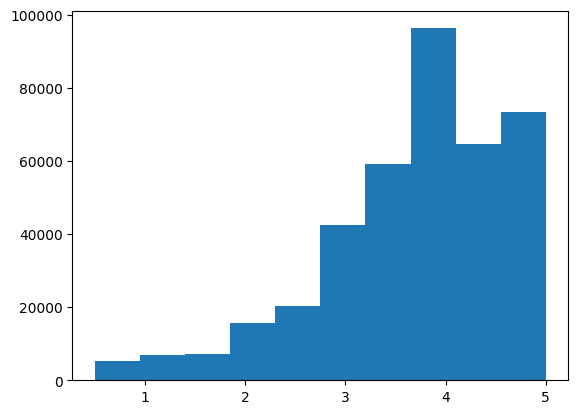

In [10]:
plt.hist(final_merged_data['rating'])